In [1]:
import re
from rdkit import Chem

In [2]:
def add_space(pro):
    return pro.replace('',' ').strip()

In [3]:
def rm_map_number(smiles):
    t = re.sub(':\d*', '', smiles)
    return t
def canonicalize(smiles):
    try:
        smiles = rm_map_number(smiles)
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        else:
            return Chem.MolToSmiles(mol)
    except:
        return None

In [4]:
def smi_tokenizer(smi):
    pattern =  "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
    regex = re.compile(pattern)
    tokens = [token for token in regex.findall(smi)]
    try:
        assert re.sub('\s+', '', smi) == ''.join(tokens)
    except:
        return ''

    return ' '.join(tokens)

In [5]:
smiles_raw = "CN1CCN(CC1)CCCN2C3=CC=CC=C3SC4=C2C=C(C=C4)Cl"
smiles_can = canonicalize(smiles_raw)
smiles_bpe = smi_tokenizer(smiles_can)
smiles_can

'CN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1'

In [81]:
protein_0 = "MFGLKRNAVIGLNLYCGGAGLGAGSGGATRPGGRLLATEKEASARREIGGGEAGAVIGGSAGASPPSTLTPDSRRVARPPPIGAEVPDVTATPARLLFFAPTRRAAPLEEMEAPAADAIMSPEEELDGYEPEPLGKRPAVLPLLELVGESGNNTSTDGSLPSTPPPAEEEEDELYRQSLEIISRYLREQATGAKDTKPMGRSGATSRKALETLRRVGDGVQRNHETAFQGMLRKLDIKNEDDVKSLSRVMIHVFSDGVTNWGRIVTLISFGAFVAKHLKTINQESCIEPLAESITDVLVRTKRDWLVKQRGWDGFVEFFHVEDLEGGIRNVLLAFAGVAGVGAGLAYLIR"
protein_1 = "MSFLGFGGGQPQLSSQQKIQAAEAELDLVTDMFNKLVNNCYKKCINTSYSEGELNKNESSCLDRCVAKYFETNVQVGENMQKMGQSFNAAGKF"
protein_2 = "MPTVDDILEQVGESGWFQKQAFLILCLLSAAFAPICVGIVFLGFTPDHHCQSPGVAELSQRCGWSPAEELNYTVPGLGPAGEAFLGQCRRYEVDWNQSALSCVDPLASLATNRSHLPLGPCQDGWVYDTPGSSIVTEFNLVCADSWKLDLFQSCLNAGFLFGSLGVGYFADRFGRKLCLLGTVLVNAVSGVLMAFSPNYMSMLLFRLLQGLVSKGNWMAGYTLITEFVGSGSRRTVAIMYQMAFTVGLVALTGLAYALPHWRWLQLAVSLPTFLFLLYYWCVPESPRWLLSQKRNTEAIKIMDHIAQKNGKLPPADLKMLSLEEDVTEKLSPSFADLFRTPRLRKRTFILMYLWFTDSVLYQGLILHMGATSGNLYLDFLYSALVEIPGAFIALITIDRVGRIYPMAMSNLLAGAACLVMIFISPDLHWLNIIIMCVGRMGITIAIQMICLVNAELYPTFVRNLGVMVCSSLCDIGGIITPFIVFRLREVWQALPLILFAVLGLLAAGVTLLLPETKGVALPETMKDAENLGRKAKPKENTIYLKVQTSEPSGT"

In [122]:
protein = add_space(protein_2)
protein

'M P T V D D I L E Q V G E S G W F Q K Q A F L I L C L L S A A F A P I C V G I V F L G F T P D H H C Q S P G V A E L S Q R C G W S P A E E L N Y T V P G L G P A G E A F L G Q C R R Y E V D W N Q S A L S C V D P L A S L A T N R S H L P L G P C Q D G W V Y D T P G S S I V T E F N L V C A D S W K L D L F Q S C L N A G F L F G S L G V G Y F A D R F G R K L C L L G T V L V N A V S G V L M A F S P N Y M S M L L F R L L Q G L V S K G N W M A G Y T L I T E F V G S G S R R T V A I M Y Q M A F T V G L V A L T G L A Y A L P H W R W L Q L A V S L P T F L F L L Y Y W C V P E S P R W L L S Q K R N T E A I K I M D H I A Q K N G K L P P A D L K M L S L E E D V T E K L S P S F A D L F R T P R L R K R T F I L M Y L W F T D S V L Y Q G L I L H M G A T S G N L Y L D F L Y S A L V E I P G A F I A L I T I D R V G R I Y P M A M S N L L A G A A C L V M I F I S P D L H W L N I I I M C V G R M G I T I A I Q M I C L V N A E L Y P T F V R N L G V M V C S S L C D I G G I I T P F I V F R L R E V W Q A L P L I L F A

In [83]:
from fairseq.models.roberta import RobertaModel
import numpy as np
roberta = RobertaModel.from_pretrained(
    f'/protein/users/v-qizhipei/checkpoints/roberta_char_bsz256_nopretrain_separate_wd0.1_dp0.1_layer12_hongda_mlm_regression_cross_attn_mod_pad',
    checkpoint_file=f'checkpoint154.pt',
    data_name_or_path='/protein/users/v-qizhipei/data-bin/BindingDB_hongda_char_for_pretrain',
    arch = 'roberta_dti_mlm_regress_case_study'
)

roberta.cuda()
roberta.eval()

RobertaHubInterface(
  (model): RobertaDTIMLMRegressCaseStudy(
    (encoder_0): DTIRobertaEncoder(
      (sentence_encoder): TransformerSentenceEncoder(
        (dropout_module): FairseqDropout()
        (embed_tokens): Embedding(2353, 768, padding_idx=1)
        (embed_positions): LearnedPositionalEmbedding(514, 768, padding_idx=1)
        (layers): ModuleList(
          (0): TransformerSentenceEncoderLayer(
            (dropout_module): FairseqDropout()
            (activation_dropout_module): FairseqDropout()
            (self_attn): MultiheadAttention(
              (dropout_module): FairseqDropout()
              (k_proj): Linear(in_features=768, out_features=768, bias=True)
              (v_proj): Linear(in_features=768, out_features=768, bias=True)
              (q_proj): Linear(in_features=768, out_features=768, bias=True)
              (out_proj): Linear(in_features=768, out_features=768, bias=True)
            )
            (self_attn_layer_norm): LayerNorm((768,), eps=1e-05,

In [123]:
tokens_0, tokens_1 = roberta.myencode_separate(smiles_bpe, protein)
predictions, cls_0_attn_1, cls_1_attn_0 = roberta.myextract_features_separate_case_study(tokens_0, tokens_1)
predictions, cls_0_attn_1, cls_1_attn_0

(tensor([[4.1925]], device='cuda:0', grad_fn=<AddmmBackward0>),
 tensor([[[2.1689e-03, 5.6051e-04, 2.0450e-03, 1.3709e-04, 1.0374e-04,
           1.8629e-04, 3.0426e-04, 1.2341e-04, 1.1925e-04, 7.0735e-04,
           4.2109e-02, 1.4311e-04, 1.5578e-04, 4.4794e-04, 2.1474e-04,
           1.8459e-04, 2.7397e-03, 5.3591e-04, 2.0849e-03, 6.9185e-04,
           2.6683e-03, 4.4569e-04, 1.2106e-04, 1.7166e-04, 1.7060e-04,
           1.3391e-04, 9.9710e-04, 1.2828e-04, 1.5114e-04, 4.0354e-04,
           1.5298e-04, 7.7665e-04, 3.0234e-04, 3.4401e-04, 2.3276e-02,
           3.8810e-04, 1.5307e-03, 3.2583e-04, 5.1474e-04, 1.0005e-03,
           2.4965e-04, 6.5911e-04, 1.5910e-04, 3.5057e-04, 2.7709e-04,
           2.1268e-04, 2.0206e-03, 1.7493e-04, 4.2083e-04, 9.7706e-04,
           1.6191e-03, 4.1048e-03, 9.5134e-04, 1.4357e-03, 3.6042e-04,
           4.8639e-04, 4.1580e-04, 1.6575e-04, 1.8353e-04, 3.5478e-04,
           5.8703e-03, 8.1221e-03, 7.0136e-04, 3.0203e-04, 7.5449e-03,
           3.

In [124]:
cls_1_attn_0 = cls_1_attn_0.squeeze()
cls_1_attn_0.size()

torch.Size([39])

In [125]:
def del_tensor_element(arr,index):
    arr1 = arr[0:index]
    arr2 = arr[index+1:]
    return torch.cat((arr1,arr2),dim=0)

In [126]:
len(cls_1_attn_0)

39

In [127]:
print(smiles_can)
len(smiles_can)

CN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1


38

In [128]:
len(smiles_bpe.split())

37

In [129]:
del_indices = []
tokens = smiles_bpe.split()
del_indices.append(0)
for i in range(37):
    if not tokens[i].isalpha():
        del_indices.append(i + 1)
del_indices.append(len(cls_1_attn_0) - 1)
del_indices

[0, 3, 7, 12, 14, 20, 23, 27, 29, 32, 33, 34, 37, 38]

In [130]:
cls_1_attn_0

tensor([0.0122, 0.0197, 0.0141, 0.0097, 0.0164, 0.0191, 0.0162, 0.0264, 0.0291,
        0.0327, 0.0315, 0.0263, 0.0233, 0.0295, 0.0241, 0.0427, 0.0408, 0.0439,
        0.0503, 0.0498, 0.0351, 0.0776, 0.0202, 0.0161, 0.0199, 0.0209, 0.0223,
        0.0308, 0.0426, 0.0190, 0.0202, 0.0203, 0.0146, 0.0102, 0.0143, 0.0162,
        0.0163, 0.0128, 0.0130], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [131]:
# cls_1_attn_0[del_indices] = 0
# cls_1_attn_0
for i in reversed(del_indices):
    cls_1_attn_0 = del_tensor_element(cls_1_attn_0, i)
cls_1_attn_0

tensor([0.0197, 0.0141, 0.0164, 0.0191, 0.0162, 0.0291, 0.0327, 0.0315, 0.0263,
        0.0295, 0.0427, 0.0408, 0.0439, 0.0503, 0.0498, 0.0776, 0.0202, 0.0199,
        0.0209, 0.0223, 0.0426, 0.0202, 0.0203, 0.0162, 0.0163],
       device='cuda:0', grad_fn=<CatBackward0>)

In [132]:
import torch
sorted, indices = torch.sort(cls_1_attn_0, descending=True)
sorted, indices

(tensor([0.0776, 0.0503, 0.0498, 0.0439, 0.0427, 0.0426, 0.0408, 0.0327, 0.0315,
         0.0295, 0.0291, 0.0263, 0.0223, 0.0209, 0.0203, 0.0202, 0.0202, 0.0199,
         0.0197, 0.0191, 0.0164, 0.0163, 0.0162, 0.0162, 0.0141],
        device='cuda:0', grad_fn=<SortBackward0>),
 tensor([15, 13, 14, 12, 10, 20, 11,  6,  7,  9,  5,  8, 19, 18, 22, 21, 16, 17,
          0,  3,  2, 24, 23,  4,  1], device='cuda:0'))

In [138]:
from rdkit.Chem import PyMol
from rdkit import Chem
import sys
from IPython.display import SVG
from rdkit import rdBase
from rdkit.Chem import AllChem, DataStructs
from rdkit.Chem.Draw import DrawMorganBit, DrawMorganBits,DrawMorganEnv, IPythonConsole
def add_atom_index(mol):
    atoms = mol.GetNumAtoms()
    for i in range( atoms ):
        # mol.GetAtomWithIdx(i).SetProp('molAtomMapNumber', str(mol.GetAtomWithIdx(i).GetIdx()))
        mol.GetAtomWithIdx(i).SetProp('molAtomMapNumber', str(i))
    return mol,atoms

In [139]:
smiles_can

'CN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1'

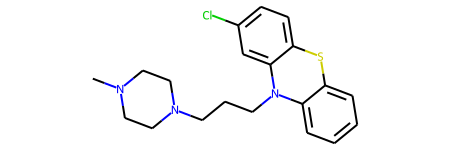

In [6]:
from rdkit.Chem import Draw
mol =Chem.MolFromSmiles(smiles_can)
# mol,atoms = add_atom_index(mol)
# print(atoms)
mol